## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Ignore future version warning (version warning)

In [2]:
#import modules
import sklearn as sk
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# REGRESSION

## Data handling

In [3]:
data = pd.read_csv("winequality-red.csv")

In [4]:
# clean data
d = preprocessing.normalize(data)
df = pd.DataFrame(d, columns=data.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [5]:
 #Seperate dependant and independant variable
data_input=df.drop(['quality'],axis=1).values
data_output=df['quality'].values

## Logistic Regression

In [6]:
#Split dataset
x_train,x_test,y_train,y_test=train_test_split(data_input,data_output,test_size=0.3,random_state=1)

In [7]:
#Train model
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=ml.predict(x_test)

In [9]:
##Evaluation of Linear regression

In [10]:
#Eval on hyper-parameters of LinearRegression
gs_LinearRegression = GridSearchCV(LinearRegression(),{
    'fit_intercept': [False,True], #Default = False
    'n_jobs': [0,1,10,50],
}, cv=10, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_LinearRegression.fit(data_input,data_output)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True],
                         'n_jobs': [0, 1, 10, 50]},
             scoring='neg_mean_squared_error')

In [11]:
dfgs = pd.DataFrame(gs_LinearRegression.cv_results_)
dfgs[['param_fit_intercept','param_n_jobs', 'mean_test_score']]
#Having 'param_fit_intercept' = True improves accuracy

,param_fit_intercept,param_n_jobs,mean_test_score
0,False,0,-0.000423
1,False,1,-0.000423
2,False,10,-0.000423
3,False,50,-0.000423
4,True,0,-0.000421
5,True,1,-0.000421
6,True,10,-0.000421
7,True,50,-0.000421


## Support Vector Machines

In [12]:
Xs_train, Xs_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.3, random_state=1)

clf = SVR(C=1.0, kernel='rbf', degree=3)
clf.fit(Xs_train, y_train)

SVR()

In [14]:
##Evaluation of SVM

In [15]:
#Eval on hyper-parameters of LinearRegression
gs_SVM = GridSearchCV(SVR(),{
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], #default rbf
    'degree' : [2,3], #default = 3, only applys to kernel: poly
}, cv=10, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_SVM.fit(data_input,data_output)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [16]:
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel','param_degree', 'mean_test_score']]
#Having 'kernel : poly' with a degree of 2 improves the accuracy 

,param_kernel,param_degree,mean_test_score
0,linear,2,-0.002554
1,poly,2,-0.002095
2,rbf,2,-0.002545
3,sigmoid,2,-0.002667
4,linear,3,-0.002554
5,poly,3,-0.002538
6,rbf,3,-0.002545
7,sigmoid,3,-0.002667


## Decision Trees and Multi-Layer

## Perceptron Neural Network.

In [17]:
mlp = MLPRegressor(max_iter=10000, activation='relu')
mlp

MLPRegressor(max_iter=10000)

In [21]:
x_train2,x_test2,y_train2,y_test2=train_test_split(data_input,data_output,test_size=0.3,random_state=1)

In [22]:
mlp.fit(x_train2,y_train2)

MLPRegressor(max_iter=10000)

In [23]:
y_pred2 = mlp.predict(x_test2)

Text(0, 0.5, 'Predicted')

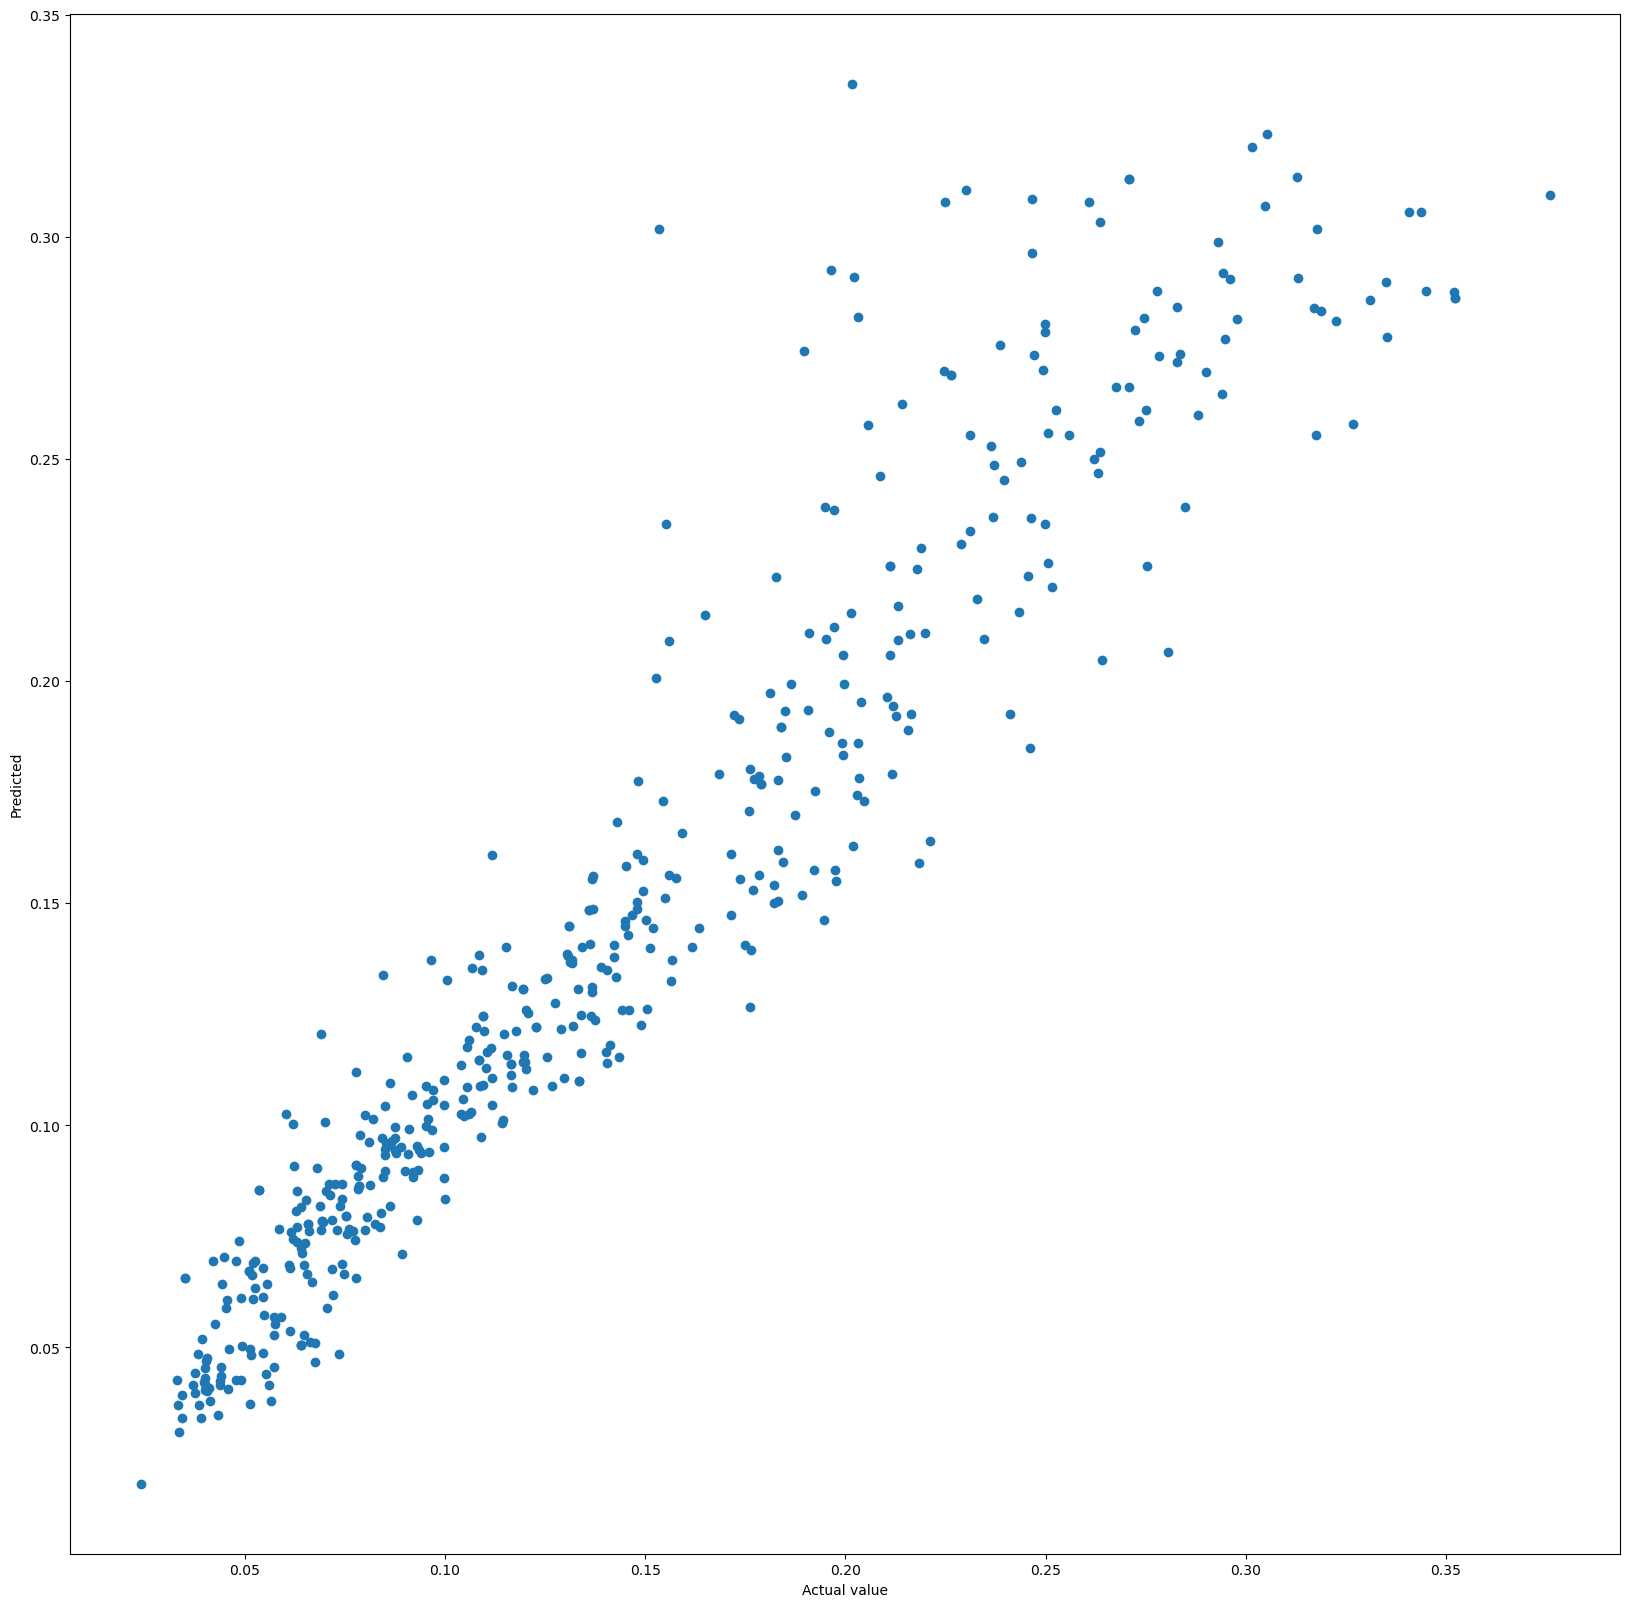

In [24]:
#Graph of how well the model performed
plt.figure(figsize=(20, 20))
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual value")
plt.ylabel("Predicted")

In [25]:
#Eval on hyper-parameters of MLPRegressor
gs_MLP = GridSearchCV( MLPRegressor(),{
    'activation': ['identity', 'logistic', 'tanh', 'relu'], #default =relu
    'solver': ['lbfgs','sgd','adam'] #default =adam
}, cv=5, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_MLP.fit(data_input,data_output)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error')

In [26]:
dfgs = pd.DataFrame(gs_MLP.cv_results_)
dfgs[['param_activation','param_solver', 'mean_test_score']]
# activation = relu , solver = lbfgs yeilds best results

,param_activation,param_solver,mean_test_score
0,identity,lbfgs,-0.000536
1,identity,sgd,-0.005078
2,identity,adam,-0.000589
3,logistic,lbfgs,-0.000587
4,logistic,sgd,-0.006567
5,logistic,adam,-0.001288
6,tanh,lbfgs,-0.000572
7,tanh,sgd,-0.006822
8,tanh,adam,-0.000599
9,relu,lbfgs,-0.000471


In [28]:
gs_MLP2 = GridSearchCV( MLPRegressor(),{
    'solver': ['lbfgs'],
    'max_fun':[15000,20000,10000,25000] #default is 15000 and only applys to lbfgs
}, cv=5, return_train_score=False,scoring = 'neg_mean_squared_error' )
gs_MLP2.fit(data_input,data_output)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'max_fun': [15000, 20000, 10000, 25000],
                         'solver': ['lbfgs']},
             scoring='neg_mean_squared_error')

In [ ]:
dfgs = pd.DataFrame(gs_MLP2.cv_results_)
dfgs[['param_max_fun', 'mean_test_score']]
#Default is best 

,param_max_fun,mean_test_score
0,15000,-0.000487
1,20000,-0.000528
2,10000,-0.000513
3,25000,-0.000518


# CLASSIFICATION

## Data Handling

In [30]:
# import classifcation data set
df=pd.read_csv('adult.csv', index_col=False)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Sum                  0
dtype: int64

In [31]:
# clean data

dfclean = df.dropna() # Drops rows with empty values
dfclean.isnull().sum()
dfclean.loc[dfclean['Age'] > 80].shape[0]
#dfclean[dfclean.Age >80].sum
#sns.boxplot(dfclean['Age'])

#data_mean = df.iloc[:, :]
#data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
#sharey=False, fontsize=12, figsize=(15,20))

75

In [32]:
dfclean.duplicated().sum()

23

In [33]:
dfdropd = dfclean.drop_duplicates()
dfdropd.duplicated().sum()

0

In [34]:
labelencoder = LabelEncoder()
dfcopy = dfdropd.copy()
#df1 = labelencoder.fit_transform(dfdropd['Sex'])
dfcopy['Race'] = labelencoder.fit_transform(dfcopy['Race'])
dfcopy['Sex'] = labelencoder.fit_transform(dfcopy['Sex'])
dfcopy['Occupation'] = labelencoder.fit_transform(dfcopy['Occupation'])
dfcopy['Relationship'] = labelencoder.fit_transform(dfcopy['Relationship'])
dfcopy['Marital-Status'] = labelencoder.fit_transform(dfcopy['Marital-Status'])
dfcopy['Education'] = labelencoder.fit_transform(dfcopy['Education'])
dfcopy['Workclass'] = labelencoder.fit_transform(dfcopy['Workclass'])
dfcopy['Native-country'] = labelencoder.fit_transform(dfcopy['Native-country'])
dfcopy['Sum'] = labelencoder.fit_transform(dfcopy['Sum'])
dfcopy

#dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [35]:
X = dfcopy[['Fnlwgt']]
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
scaler = StandardScaler()
dfcopy['Fnlwgt'] = scaler.fit_transform(X)
data = dfcopy
dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,-1.062676,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,-1.007829,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,0.244669,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,0.425206,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,1.406572,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0.638926,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,-0.335246,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,-0.358567,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,0.110688,11,9,4,0,3,4,1,0,0,20,38,0


## Logistic Regression

In [37]:
# split X and y into training and test sets, test set 30% of data 
from sklearn.model_selection import train_test_split 

X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1, stratify=y)

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(solver = 'newton-cg')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

classifier_score = logreg.score(X_test, y_test )
print(classifier_score)

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,
random_state=1, stratify=y1)

logreg.fit(X1_train, y1_train)
y_pred = logreg.predict(X1_test)

print(classification_report(y_test, y_pred))

classifier_score = logreg.score(X1_test, y1_test )
print(classifier_score)

# try different argument for solver
logreg2 = LogisticRegression(solver = "liblinear")
logreg2.fit(X_train, y_train)

y_pred = logreg2.predict(X_test)
print(classification_report(y_test, y_pred))

classifier_score = logreg2.score(X_test, y_test )
print(classifier_score)

# try solver = liblinear on reduced features data 
logreg2.fit(X1_train, y1_train)
y_pred = logreg2.predict(X1_test)
print(classification_report(y1_test, y_pred))

classifier_score = logreg2.score(X1_test, y1_test )
print(classifier_score)
# dropping the features reduces the classification score and precision.
# differs from SVM where dropping the features increased classification score

# try k fold cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
# model with just 6 best features selected (k=6)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=6)),
 ('logreg', LogisticRegression(solver='liblinear'))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6790
           1       0.72      0.46      0.56      2252

    accuracy                           0.82      9042
   macro avg       0.78      0.70      0.73      9042
weighted avg       0.81      0.82      0.81      9042

0.8216102632161026
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6790
           1       0.68      0.42      0.52      2252

    accuracy                           0.81      9042
   macro avg       0.75      0.68      0.70      9042
weighted avg       0.79      0.81      0.79      9042

0.8064587480645875
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6790
           1       0.73      0.45      0.56      2252

    accuracy                           0.82      9042
   macro avg       0.78      0.70      0.72      9042
weighted avg       0.81      0.82   

In [38]:
from sklearn.linear_model import LogisticRegression 

In [42]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'penalty': ['none','l2','l1','elasticnet'] #default = l2
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['none', 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [43]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_penalty', 'mean_test_score']]

,param_penalty,mean_test_score
0,none,0.799994
1,l2,0.800690
2,l1,NaN
3,elasticnet,NaN


In [60]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
    'fit_intercept' : [True,False], #default = l2
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [61]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_fit_intercept','param_solver', 'mean_test_score']]

,param_fit_intercept,param_solver,mean_test_score
0,True,newton-cg,0.820001
1,True,lbfgs,0.800690
2,True,liblinear,0.819536
3,True,sag,0.788381
4,True,saga,0.782541
5,False,newton-cg,0.801785
6,False,lbfgs,0.800491
7,False,liblinear,0.801885
8,False,sag,0.788347
9,False,saga,0.782541


In [62]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'solver' : ['newton-cg'],
    #default for fit_intercept = True
    'multi_class' : ['auto','ovr','multinomial']
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg']},
             scoring='accuracy')

In [63]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_multi_class', 'mean_test_score']]

,param_multi_class,mean_test_score
0,auto,0.820001
1,ovr,0.820001
2,multinomial,0.820001


## Support Vector Machines

In [ ]:
# split into X and y
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']
# split X and y into training and test sets, test set 30% of data 
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85,
random_state=1, stratify=y)

In [ ]:
# First try SVM with all features selected 
svclassifier = SVC(C=1.0,degree=3, gamma='auto', probability=True)
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
classifier_score = svclassifier.score(X_test, y_test)
print(f"Classifier Score is {classifier_score}")

In [ ]:
# Try dropping features
# Drop Capital-gain and capital-loss due to low variability 
# Drop Education due to Education-num encoding similar data 
# Drop Native-country for low variability (mostly U.S)
# Drop Race for having lowest Chi-Squared statistic 

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
df_reduced.head()

In [ ]:
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.85,
random_state=1, stratify=y1)

In [ ]:
svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X1_train, y1_train)

In [ ]:
y1_pred = svclassifier.predict(X1_test)

In [ ]:
print(classification_report(y1_test, y1_pred))

In [ ]:
## precision for 0 (<=50k) has increased however the precision for 1 (50k >) has decreased
classifier_score1 = svclassifier.score(X1_test, y1_test)
print(f"Classifier Score is {classifier_score1}")

In [ ]:
# model with just 3 best features selected (k=3)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=3)),
 ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

## Decision Trees and Multi-Layer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sum',axis=1), data['Sum'], test_size=.3,random_state=23)
clf = RandomForestClassifier(random_state=1)
dtt = clf.fit(X_train, y_train)
predictions = dtt.predict(X_test)
print(accuracy_score(y_test, predictions))



## Perceptron Neural Network.

## Analysis

In [ ]:
# create df of the numerical values and Sum to create multiple boxplots

df_numerical = dfdropd[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sum']].copy()

df_numerical.head()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

for i, col in enumerate(df_numerical.columns[0:6]):
    _= sns.boxplot(y=col, x='Sum', data=df_numerical, ax=axes[i])

In [ ]:
# from the boxplots it looks like fnlwgt is similar for both classes, so we may potentially drop that feature.
# also, captital-gain and capital-loss are mostly zero for both classes, so we could drop these as well due to low variability

#Now try to plot the categorical features 
#look at value counts first 

categorical_cols = ['Workclass', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

for col in categorical_cols:
    vals = dfdropd[[col]].value_counts()
    print(vals)
    
# data is skewed towards private sector, white race, males, and United States

In [ ]:
# will use histograms for all categorical features bar countries 
first_dim = 'Sum' 
second_dim = 'Sex'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# males tend to earn more than 50k however the data is skewed towards males 

In [ ]:
first_dim = 'Sum' 
second_dim = 'Race'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# again, data is heavily skewed towards White so hard to tell

In [ ]:
first_dim = 'Sum' 
second_dim = 'Relationship'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# can see husbands are more likely to earn over 50k, not-in-family and own child less likely - important feature

In [ ]:
first_dim = 'Sum' 
second_dim = 'Marital-Status'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# Married-civ-spouse most liekly to earn over 50k, never-married and divorsed less likely, rest of data is smaller 
# in comparison 

In [ ]:
first_dim = 'Sum' 
second_dim = 'Workclass'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
#data skewed towards private secotr so hard to make judgement, similar results for both classes

In [ ]:
first_dim = 'Sum' 
second_dim = 'Occupation'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )

# exec- managerial and prof-speciality both most likely to earn over 50k, data well spread out - important feature. 